In [ ]:
# import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder


In [ ]:
sns.set(font_scale=1.5)

In [ ]:
# read the cleaned dataset
df = pd.read_csv( "Data/resd_clean.csv" )

### Feature selection

### correlation method to select features for modeling

#### Preliminary exploration

In [ ]:
# check for the new shape and columns
df.shape, df.columns

((191, 14),
 Index(['index', 'sub_area', 'n_bhk', 'surface', 'price', 'company_name',
        'township', 'club_house', 'school', 'hospital', 'mall', 'park', 'pool',
        'gym'],
       dtype='object'))

In [ ]:
 # check for the unique values
df["company_name"].unique(), df["township"].unique()


(array(['shapoorji paloonji', 'godrej properties', 'anp corp',
        'urban space creator', 'vtp reality', 'waghvani constructions',
        'sukwani associates', 'mantra properties', 'ravima ventures',
        'proviso group', 'unique properties', 'sagitarius ecospaces llp',
        'nirman developers', 'jhala group', 'shroff developers',
        'kundan spaces', 'venkatesh bhoomi construction', 'lush life',
        'maha anand pinnac associates', 'vasupujya corporation',
        'ace constructions', 'wellwisher apartments', 'dolphin group',
        'oxy buildcorp', 'kohinoor group', 'bhaktamar realities',
        'porwal & anand develkoper', 'porwal  develkoper',
        'keystone landmark', 'puraniks', 'majestique landmarks',
        'kalpataru', 'vijaya laxmi creations',
        'vijaya laxmi infrarealtors', 'calyx spaces', 'supreme',
        'tejraaj group'], dtype=object),
 array(['vanaha', 'godrej hills retreat', 'anp universe', 'urban skyline',
        'vtp cierra', 'vtp blue

In [ ]:
df["company_name"].nunique(), df["township"].nunique()

(37, 53)

In [ ]:
# drop the columns company_name, township and Index 
# and also drop duplicates rows
print(df.shape)
df = df.drop(columns=["index", "company_name", "township"]).drop_duplicates()
print(df.shape)

(191, 14)
(191, 11)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 190
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sub_area    191 non-null    object 
 1   n_bhk       191 non-null    float64
 2   surface     191 non-null    float64
 3   price       191 non-null    float64
 4   club_house  191 non-null    object 
 5   school      191 non-null    object 
 6   hospital    191 non-null    object 
 7   mall        191 non-null    object 
 8   park        191 non-null    object 
 9   pool        191 non-null    object 
 10  gym         191 non-null    object 
dtypes: float64(3), object(8)
memory usage: 17.9+ KB


In [ ]:
df.tail(10)

,sub_area,n_bhk,surface,price,club_house,school,hospital,mall,park,pool,gym
181,bavdhan,2.0,665.0,6.499,yes,no,no,no,yes,no,no
182,talegoan,1.0,280.0,1.319,yes,no,no,no,yes,yes,yes
183,talegoan,2.0,385.0,1.729,yes,no,no,no,yes,no,yes
184,baner,2.0,730.0,8.700,yes,no,no,no,yes,yes,yes
185,baner,3.0,1135.0,12.900,yes,no,no,no,yes,yes,yes
186,baner,3.0,1350.0,16.000,yes,no,no,no,yes,yes,yes
187,baner,4.0,1600.0,23.000,yes,no,no,no,yes,yes,yes
188,baner,2.0,789.0,9.500,no,no,no,no,yes,yes,yes
189,baner,3.0,1107.0,13.500,no,no,no,no,yes,yes,yes
190,baner,2.0,776.0,9.068,yes,no,no,no,yes,yes,yes


## Converting binary columns to dummy variables

In [ ]:
# Selecting the binary columns
binary_cols = df.iloc[:, 4:].columns.to_list()
binary_cols


['club_house', 'school', 'hospital', 'mall', 'park', 'pool', 'gym']

In [ ]:
# average price for apartments with and without swimming pool ( groupby and mean())
df[["price", "pool"]].groupby("pool")["price"].mean()

pool
no      6.470113
yes    10.039575
Name: price, dtype: float64

In [ ]:
# Transforming Binary cols to number : the yes/no to 1/0

laben = LabelEncoder()

for col in binary_cols:
    print(col)
    df[col] = laben.fit_transform(df[col])
    
df.tail(10)


club_house
school
hospital
mall
park
pool
gym


,sub_area,n_bhk,surface,price,club_house,school,hospital,mall,park,pool,gym
181,bavdhan,2.0,665.0,6.499,1,0,0,0,1,0,0
182,talegoan,1.0,280.0,1.319,1,0,0,0,1,1,1
183,talegoan,2.0,385.0,1.729,1,0,0,0,1,0,1
184,baner,2.0,730.0,8.700,1,0,0,0,1,1,1
185,baner,3.0,1135.0,12.900,1,0,0,0,1,1,1
186,baner,3.0,1350.0,16.000,1,0,0,0,1,1,1
187,baner,4.0,1600.0,23.000,1,0,0,0,1,1,1
188,baner,2.0,789.0,9.500,0,0,0,0,1,1,1
189,baner,3.0,1107.0,13.500,0,0,0,0,1,1,1
190,baner,2.0,776.0,9.068,1,0,0,0,1,1,1


## Sub areas contribution

In [ ]:
df.groupby("sub_area")["price"].count().reset_index().rename(columns={"price":"count"}).sort_values("count", ascending=False)\
                .reset_index(drop=True).head()

,sub_area,count
0,kharadi,16
1,baner,12
2,ravet,12
3,bavdhan,10
4,bt kawade rd,10


In [ ]:
# Contribution of different sub-areas on the dataset 

df_sa_count = df.groupby("sub_area")["price"].count().reset_index()\
                .rename(columns={"price":"count"})\
                .sort_values("count", ascending=False)\
                .reset_index(drop=True)

# frequency of sub-area sa_contribution: (count of number of property/total number of property)
df_sa_count["sa_contribution"] = df_sa_count["count"]/len(df)
df_sa_count

,sub_area,count,sa_contribution
0,kharadi,16,0.083770
1,baner,12,0.062827
2,ravet,12,0.062827
3,bavdhan,10,0.052356
4,bt kawade rd,10,0.052356
5,handewadi,10,0.052356
6,wadgaon sheri,9,0.047120
7,hinjewadi,9,0.047120
8,mahalunge,9,0.047120
9,hadapsar,8,0.041885


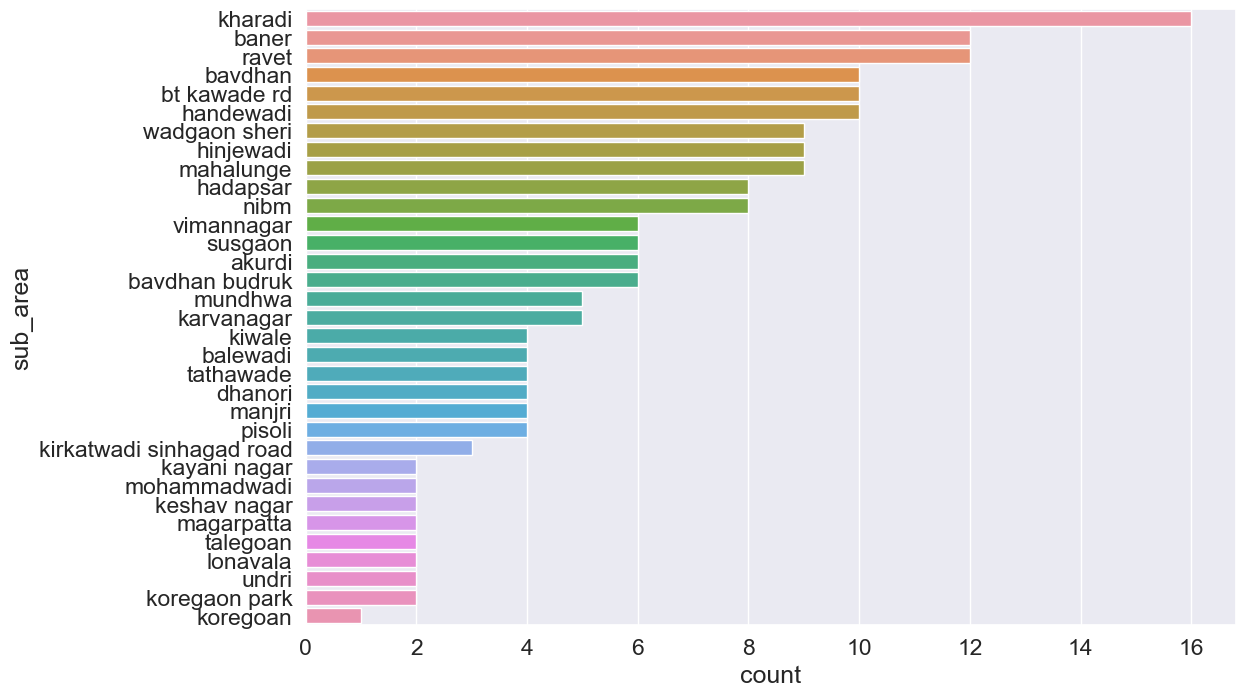

In [ ]:
# Distribution of sub-areas contribution 
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=df_sa_count, x="count", y="sub_area", ax=ax)
plt.show()


In [ ]:
# len of number of sub area & compute the mean count for sub-area
len(df_sa_count), np.mean(df_sa_count["count"])

(33, 5.787878787878788)

In [ ]:
ds = df_sa_count.merge( df[["sub_area", "surface", "price"]], on="sub_area")
ds

,sub_area,count,sa_contribution,surface,price
0,kharadi,16,0.083770,446.0,3.70
1,kharadi,16,0.083770,796.0,5.70
2,kharadi,16,0.083770,842.0,5.90
3,kharadi,16,0.083770,865.0,6.10
4,kharadi,16,0.083770,902.0,6.30
...,...,...,...,...,...
186,undri,2,0.010471,646.0,4.32
187,undri,2,0.010471,717.0,4.74
188,koregaon park,2,0.010471,882.0,9.70
189,koregaon park,2,0.010471,1103.0,12.00


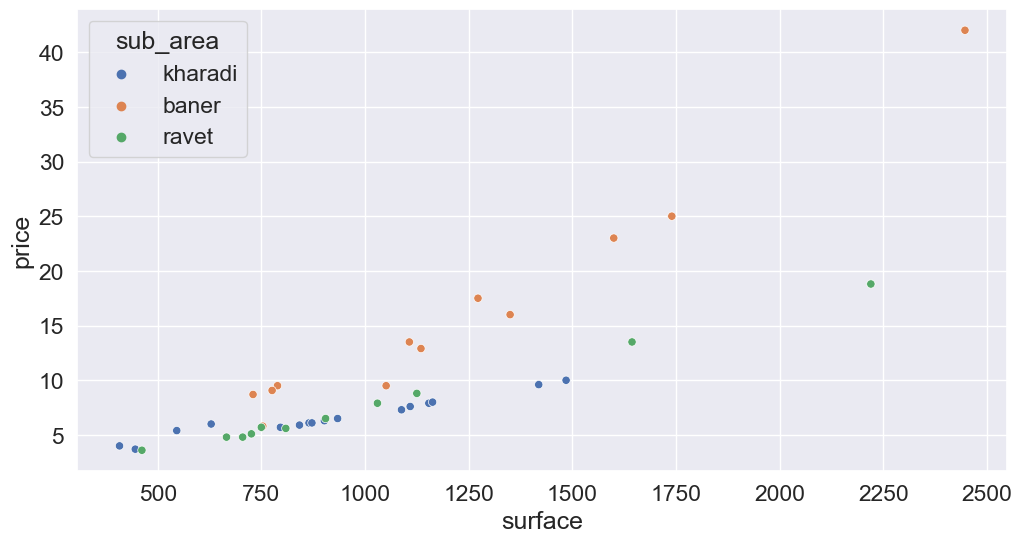

In [ ]:
# Price vs surface for the first three most contribuions
fig, ax = plt.subplots(figsize=(12, 6))
df_plot = df_sa_count.merge( df[["sub_area", "surface", "price"]], on="sub_area")
df_plot = df_plot[df_plot["count"]>11]

sns.scatterplot(data=df_plot, x="surface", y="price", hue="sub_area")
plt.show()



## Feature engineering

### len of number of sub area & compute the mean count for sub-area
(33, 5.787878787878788)

### Problem is, there are in data count for properties in sub-area is very less for some sub-areas 
### if we train dataset for some sub areas the property count is less than 6 
### then this model is highly overfit for the properties which has more property count

In [ ]:
# list all sub-areas which has properties count greater than 7
sa_sel_col = df_sa_count.loc[df_sa_count["count"]>7, "sub_area"].to_list()
print(sa_sel_col)
# if sub-area not in properties count more than 7 then rename that sub-area as other
df["sub_area"] = df["sub_area"].where(df["sub_area"].isin(sa_sel_col), "other")

['kharadi', 'baner', 'ravet', 'bavdhan', 'bt kawade rd', 'handewadi', 'wadgaon sheri', 'hinjewadi', 'mahalunge', 'hadapsar', 'nibm']


In [ ]:
df["sub_area"].unique(), len(df["sub_area"].unique())

(array(['bavdhan', 'mahalunge', 'other', 'ravet', 'baner', 'kharadi',
        'hadapsar', 'handewadi', 'nibm', 'bt kawade rd', 'hinjewadi',
        'wadgaon sheri'], dtype=object),
 12)

In [ ]:
df.head()

,sub_area,n_bhk,surface,price,club_house,school,hospital,mall,park,pool,gym
0,bavdhan,1.0,492.0,3.9,1,1,1,1,1,1,1
1,bavdhan,2.0,774.0,6.5,1,1,1,1,1,1,1
2,bavdhan,3.0,889.0,7.4,1,1,1,1,1,1,1
3,bavdhan,3.0,1018.0,8.9,1,1,1,1,1,1,1
4,mahalunge,2.0,743.0,7.4,1,1,1,1,1,1,1


In [ ]:
df['sub_area'].value_counts()

other            78
kharadi          16
ravet            12
baner            12
bavdhan          10
handewadi        10
bt kawade rd     10
mahalunge         9
hinjewadi         9
wadgaon sheri     9
hadapsar          8
nibm              8
Name: sub_area, dtype: int64

#### Converting Sub-Area to dummy variables

In [ ]:
# Dummy variable conversion (OneHotEncoder or get_dummies() by pandas)
# there are 12 categories in column sub-area so 12 new columns are created
hoten = OneHotEncoder(sparse=False)
X_dummy = hoten.fit_transform( df[["sub_area"]] )
X_dummy.shape, X_dummy, X_dummy.dtype

((191, 12),
 array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]),
 dtype('float64'))

In [ ]:
# Type conversion : float to int64
X_dummy = X_dummy.astype("int64")


In [ ]:
# Adding the dummy columns to the dataset
sa_cols_name = ["sa"+str(i+1) for i in range(X_dummy.shape[1])]
df.loc[:,sa_cols_name] = X_dummy
df.head()

,sub_area,n_bhk,surface,price,club_house,school,hospital,mall,park,pool,...,sa3,sa4,sa5,sa6,sa7,sa8,sa9,sa10,sa11,sa12
0,bavdhan,1.0,492.0,3.9,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,bavdhan,2.0,774.0,6.5,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,bavdhan,3.0,889.0,7.4,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,bavdhan,3.0,1018.0,8.9,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,mahalunge,2.0,743.0,7.4,1,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Sub_area and dummy columns relationship 
# eg.: sa1 dummy column for baner sub-area.

sub_rel = df[["sub_area"]+sa_cols_name].drop_duplicates()\
            .sort_values("sub_area").reset_index(drop=True)
sub_rel

,sub_area,sa1,sa2,sa3,sa4,sa5,sa6,sa7,sa8,sa9,sa10,sa11,sa12
0,baner,1,0,0,0,0,0,0,0,0,0,0,0
1,bavdhan,0,1,0,0,0,0,0,0,0,0,0,0
2,bt kawade rd,0,0,1,0,0,0,0,0,0,0,0,0
3,hadapsar,0,0,0,1,0,0,0,0,0,0,0,0
4,handewadi,0,0,0,0,1,0,0,0,0,0,0,0
5,hinjewadi,0,0,0,0,0,1,0,0,0,0,0,0
6,kharadi,0,0,0,0,0,0,1,0,0,0,0,0
7,mahalunge,0,0,0,0,0,0,0,1,0,0,0,0
8,nibm,0,0,0,0,0,0,0,0,1,0,0,0
9,other,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
w = sub_rel.set_index('sub_area')
d = {}
for col in w.columns.tolist():
    d[w[w[col]==1].index[0]] = col
d

{'baner': 'sa1',
 'bavdhan': 'sa2',
 'bt kawade rd': 'sa3',
 'hadapsar': 'sa4',
 'handewadi': 'sa5',
 'hinjewadi': 'sa6',
 'kharadi': 'sa7',
 'mahalunge': 'sa8',
 'nibm': 'sa9',
 'other': 'sa10',
 'ravet': 'sa11',
 'wadgaon sheri': 'sa12'}

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 190
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sub_area    191 non-null    object 
 1   n_bhk       191 non-null    float64
 2   surface     191 non-null    float64
 3   price       191 non-null    float64
 4   club_house  191 non-null    int32  
 5   school      191 non-null    int32  
 6   hospital    191 non-null    int32  
 7   mall        191 non-null    int32  
 8   park        191 non-null    int32  
 9   pool        191 non-null    int32  
 10  gym         191 non-null    int32  
 11  sa1         191 non-null    int64  
 12  sa2         191 non-null    int64  
 13  sa3         191 non-null    int64  
 14  sa4         191 non-null    int64  
 15  sa5         191 non-null    int64  
 16  sa6         191 non-null    int64  
 17  sa7         191 non-null    int64  
 18  sa8         191 non-null    int64  
 19  sa9         191 non-null    i

## Univariate and bivariate analyses

In [ ]:
# check only object datatype columns (not consider sub_area column)
data = df.select_dtypes(exclude="object")

In [ ]:
data.head()

,n_bhk,surface,price,club_house,school,hospital,mall,park,pool,gym,...,sa3,sa4,sa5,sa6,sa7,sa8,sa9,sa10,sa11,sa12
0,1.0,492.0,3.9,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2.0,774.0,6.5,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,889.0,7.4,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1018.0,8.9,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,743.0,7.4,1,1,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
data.describe()

,n_bhk,surface,price,club_house,school,hospital,mall,park,pool,gym,...,sa3,sa4,sa5,sa6,sa7,sa8,sa9,sa10,sa11,sa12
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,...,191.000000,191.000000,191.000000,191.000000,191.00000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,2.471204,898.523560,8.712707,0.738220,0.031414,0.031414,0.031414,0.979058,0.628272,0.811518,...,0.052356,0.041885,0.052356,0.047120,0.08377,0.047120,0.041885,0.408377,0.062827,0.047120
std,1.186751,376.550204,5.860711,0.440759,0.174891,0.174891,0.174891,0.143568,0.484536,0.392124,...,0.223329,0.200852,0.223329,0.212453,0.27777,0.212453,0.200852,0.492825,0.243290,0.212453
min,1.000000,280.000000,1.319000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,670.000000,5.078000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,796.000000,7.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1055.500000,9.793500,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000
max,9.000000,2447.000000,46.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Continous variables

['n_bhk', 'surface', 'price']


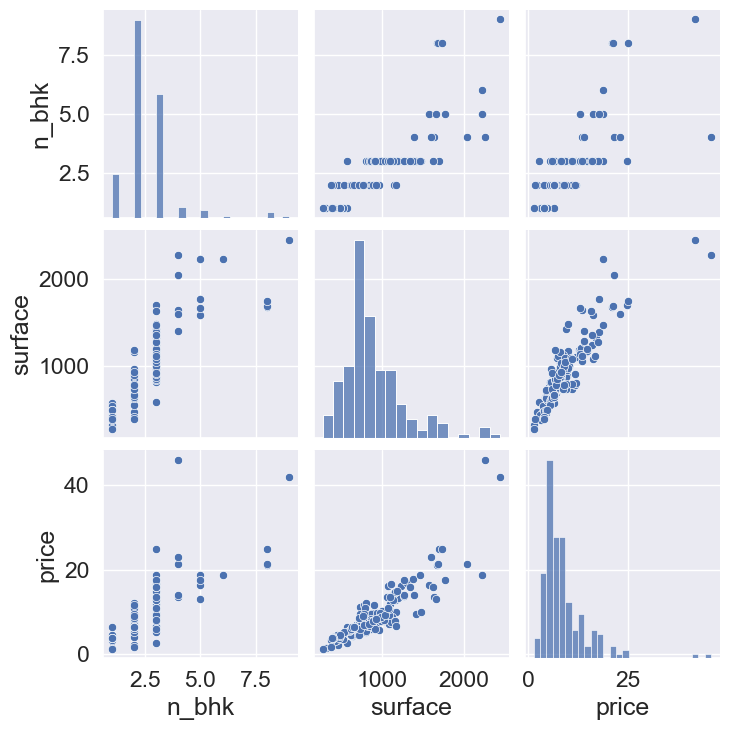

In [ ]:
float_cols = data.select_dtypes( include="float" ).columns.to_list()
print(float_cols)
sns.pairplot( data[float_cols] )
plt.show()

#### Binary variables

['club_house', 'school', 'hospital', 'mall', 'park', 'pool', 'gym']


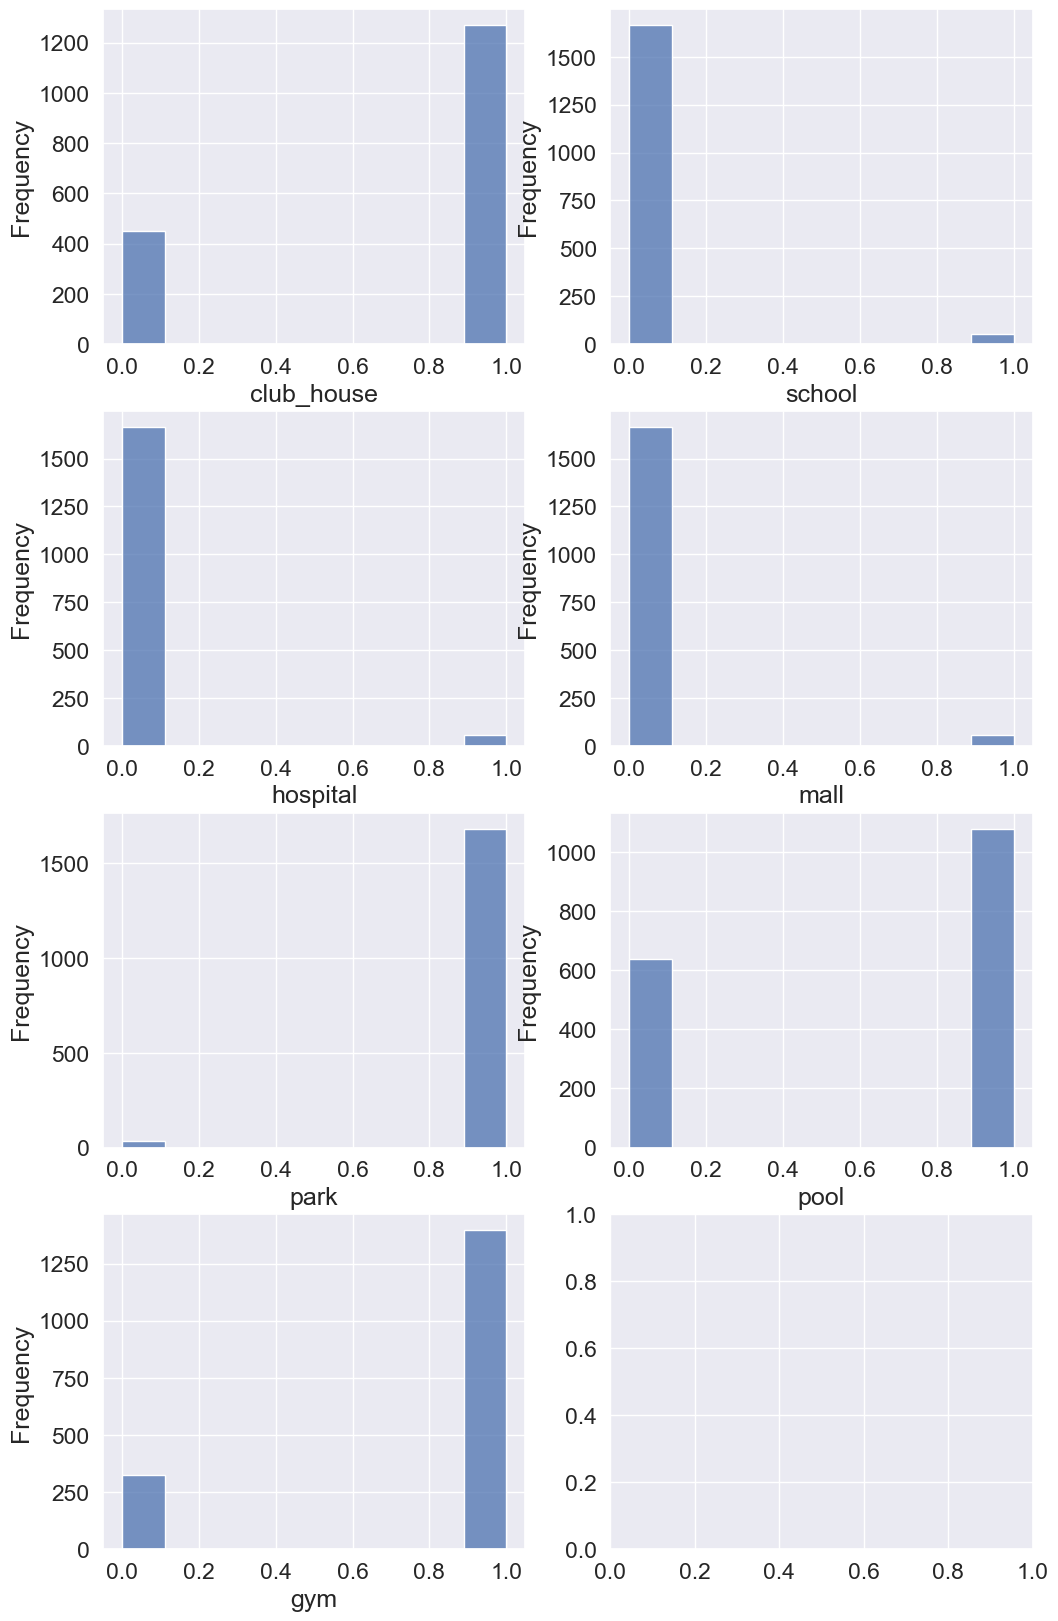

In [ ]:
print(binary_cols)
fig, ax = plt.subplots(4,2, figsize=(12,20))
for i, col in enumerate(binary_cols):
    sns.histplot(data, x=col, ax=ax[int(i/2), i%2], stat="frequency")

In [ ]:
# histogram shows frequency contribution of specific amenity towards data
# Analysis is more than school, mall and hospital not available in property
# and park this feature are not relatable to decide price of property
# whereas club-house, pool and gym is important for model build

#### Correlation map

C:\Users\user\AppData\Local\Temp\ipykernel_17868\4151046342.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correl, dtype=np.bool)


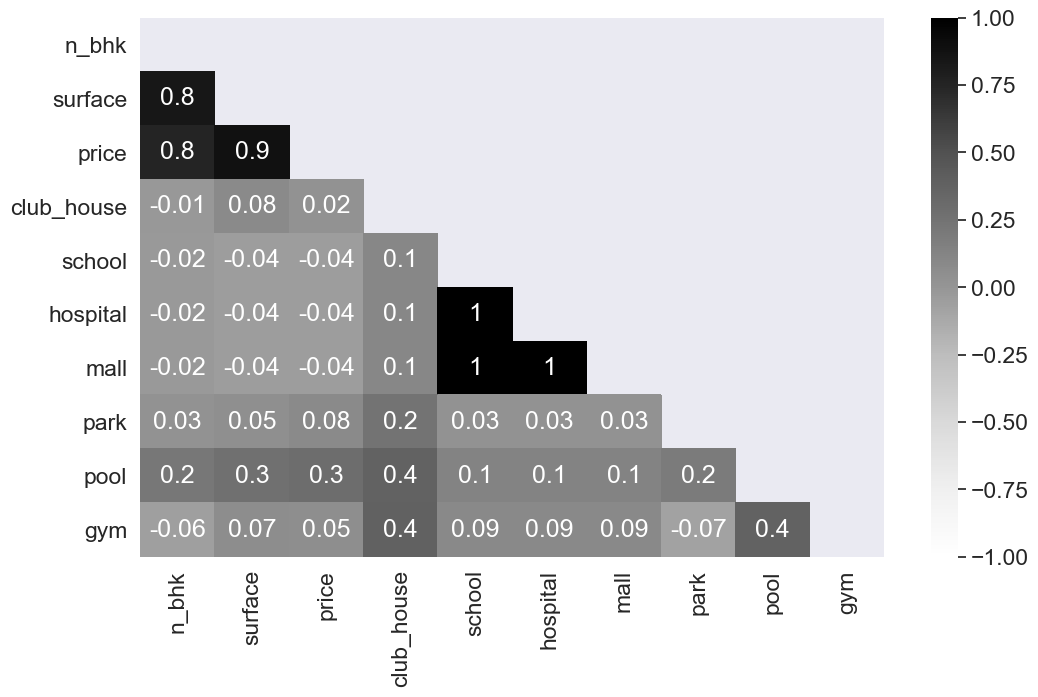

In [ ]:
corr_cols_list = float_cols + binary_cols
correl = data[corr_cols_list].corr()
mask = np.zeros_like(correl, dtype=np.bool) 

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots( figsize=(12,7) )
sns.heatmap(correl, mask=mask, vmin=-1, cmap='Greys', 
            annot=True, fmt='.1g')
plt.show()   

In [ ]:
sa_cols_name

['sa1',
 'sa2',
 'sa3',
 'sa4',
 'sa5',
 'sa6',
 'sa7',
 'sa8',
 'sa9',
 'sa10',
 'sa11',
 'sa12']

## Feature selection

In [ ]:
corr_cols_list

['n_bhk',
 'surface',
 'price',
 'club_house',
 'school',
 'hospital',
 'mall',
 'park',
 'pool',
 'gym']

In [ ]:
# Price correlation with all other columns
corr_cols_list.remove("price")
corr_cols_list.extend(sa_cols_name)
corr_list = [] # to keep the correlations with price
for col in corr_cols_list:
    corr_list.append( round(data["price"].corr(data[col]),2) )    

corr_list

[0.76,
 0.88,
 0.02,
 -0.04,
 -0.04,
 -0.04,
 0.08,
 0.3,
 0.05,
 0.32,
 -0.12,
 0.08,
 -0.04,
 -0.17,
 0.0,
 -0.11,
 -0.05,
 0.23,
 -0.03,
 -0.0,
 -0.07]

In [ ]:
# Sorted correlations
df_corr = pd.DataFrame( data=zip(corr_cols_list, corr_list), 
                 columns=["col_name", "corr"] )\
            .sort_values("corr", ascending=False)\
            .reset_index(drop=True)
df_corr

,col_name,corr
0,surface,0.88
1,n_bhk,0.76
2,sa1,0.32
3,pool,0.30
4,sa9,0.23
5,sa3,0.08
6,park,0.08
7,gym,0.05
8,club_house,0.02
9,sa11,-0.00


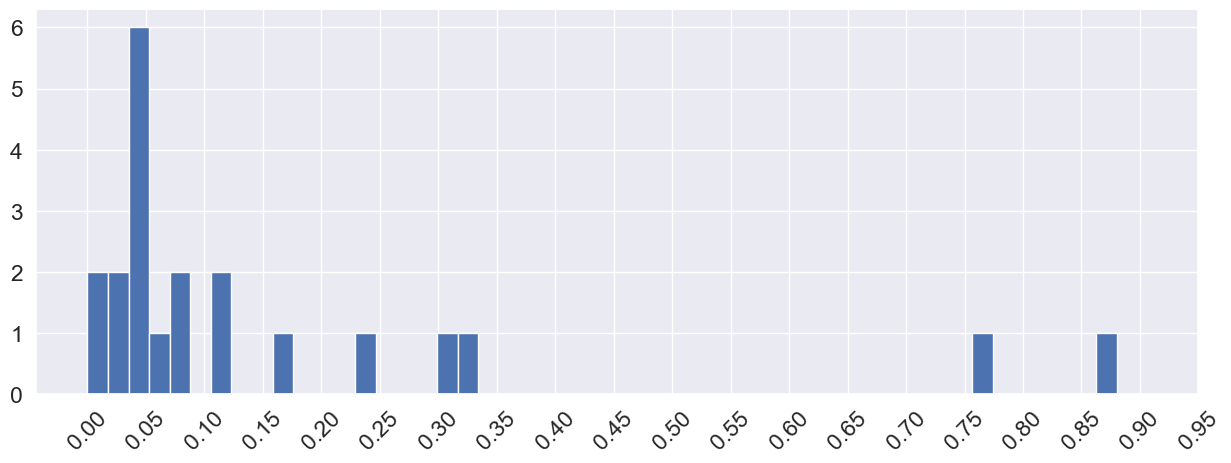

In [ ]:
# Distribution of correlations with price 
fig, ax = plt.subplots(figsize=(15,5))
abs(df_corr["corr"]).hist(bins=50)
ax.set_xticks(np.arange(0, 1, 0.05))
plt.xticks(rotation=45)
plt.show()

In [ ]:
features = df_corr.loc[abs(df_corr["corr"])>.1, "col_name"].to_list() 
features, len(features)

(['surface', 'n_bhk', 'sa1', 'pool', 'sa9', 'sa7', 'sa2', 'sa5'], 8)

In [ ]:
# Keeping the sub areas' name, their mean price and frequency (count)
sa_feature_list = [sa for sa in features if "sa" in sa]
lst = []
for col in sa_feature_list:
    sa_triger = df[col]==1
    sa = df.loc[sa_triger, "sub_area"].to_list()[0]
    x = df.loc[sa_triger, "price"]
    lst.append( (sa, np.mean(x), df[col].sum()) )

lst


[('baner', 16.038999999999998, 12),
 ('nibm', 15.1, 8),
 ('kharadi', 6.6310625000000005, 16),
 ('bavdhan', 5.804400000000001, 10),
 ('handewadi', 4.4735000000000005, 10)]

In [ ]:
# sub area mean price comparision 
sa_f = pd.DataFrame(lst, columns=["sub_area","mean_price", "count"])
sa_f["total_mean_price"] = np.mean(df["price"])   # Average price for all apt in pune
sa_f

,sub_area,mean_price,count,total_mean_price
0,baner,16.039000,12,8.712707
1,nibm,15.100000,8,8.712707
2,kharadi,6.631063,16,8.712707
3,bavdhan,5.804400,10,8.712707
4,handewadi,4.473500,10,8.712707


In [ ]:
# Baner and nibm are most positive corelate to price 
# as mean price are very greater than total mean price in pune so they are most Expensive
# And Kharadi, Bavdhan and Hindewadi are negatively correlated to price
# as mean price for this sub-areas is less than total mean price in pune so they are less expensive

## Data scalling

In [ ]:
# Selection the final dataset
sel_data = data[features+["price"]].copy()
sel_data.head()

,surface,n_bhk,sa1,pool,sa9,sa7,sa2,sa5,price
0,492.0,1.0,0,1,0,0,1,0,3.9
1,774.0,2.0,0,1,0,0,1,0,6.5
2,889.0,3.0,0,1,0,0,1,0,7.4
3,1018.0,3.0,0,1,0,0,1,0,8.9
4,743.0,2.0,0,1,0,0,0,0,7.4


In [ ]:
# Standard scaling for surface
# variation of values in all columns are same
# all the feature in same order of magnitude

# only surface column is not same range as other cols
sc = StandardScaler(with_std=True, with_mean=True)
sel_data["surface"] = sc.fit_transform(sel_data[["surface"]])


In [ ]:
# Showing the final datset
sel_data

,surface,n_bhk,sa1,pool,sa9,sa7,sa2,sa5,price
0,-1.082437,1.0,0,1,0,0,1,0,3.900
1,-0.331565,2.0,0,1,0,0,1,0,6.500
2,-0.025358,3.0,0,1,0,0,1,0,7.400
3,0.318126,3.0,0,1,0,0,1,0,8.900
4,-0.414108,2.0,0,1,0,0,0,0,7.400
...,...,...,...,...,...,...,...,...,...
186,1.202132,3.0,1,1,0,0,0,0,16.000
187,1.867799,4.0,1,1,0,0,0,0,23.000
188,-0.291625,2.0,1,1,0,0,0,0,9.500
189,0.555104,3.0,1,1,0,0,0,0,13.500


## Saving the data

In [ ]:
# save the new data
sel_data.to_csv("Data/resd_features.csv", index=False)